## Buisness Objevtive

#### To Predict the price of the house

In [3]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## DataSet Details

In [2]:
from  sklearn.datasets import load_boston

In [15]:
df =  load_boston()
dataset_boston = pd.DataFrame(df.data, columns= df.feature_names)


In [16]:
dataset_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
dataset_boston["house_price"] = df.target

In [20]:
dataset_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'house_price'],
      dtype='object')

## EXploratory Data Analysis

In [21]:
dataset_boston.shape

(506, 14)

In [22]:
dataset_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [23]:
dataset_boston.isna().sum()

CRIM           0
ZN             0
INDUS          0
CHAS           0
NOX            0
RM             0
AGE            0
DIS            0
RAD            0
TAX            0
PTRATIO        0
B              0
LSTAT          0
house_price    0
dtype: int64

In [26]:
dataset_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           506 non-null    float64
 2   INDUS        506 non-null    float64
 3   CHAS         506 non-null    float64
 4   NOX          506 non-null    float64
 5   RM           506 non-null    float64
 6   AGE          506 non-null    float64
 7   DIS          506 non-null    float64
 8   RAD          506 non-null    float64
 9   TAX          506 non-null    float64
 10  PTRATIO      506 non-null    float64
 11  B            506 non-null    float64
 12  LSTAT        506 non-null    float64
 13  house_price  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [27]:
#Independent Variable

X = dataset_boston.iloc[:,:-1]

# Depenedent variable
y =dataset_boston.iloc[:,-1]

## Model Building

#### 1.) Linear Regression

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr_model = LinearRegression()

In [35]:
mse_score = cross_val_score(lr_model,X,y,scoring = "neg_mean_squared_error", cv=5)
mse_score

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [36]:
mean_score = np.mean(mse_score)
mean_score

-37.131807467699296

#### 2.) Lasso Regression

In [38]:
from sklearn.linear_model  import Ridge
from sklearn.model_selection import GridSearchCV

In [51]:
ridge_model= Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100, 100]}
ridge_model = GridSearchCV(ridge_model,parameters,scoring="neg_mean_squared_error", cv=5)
ridge_model.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100, 100]},
             scoring='neg_mean_squared_error')

In [52]:
ridge_model.best_score_ , ridge_model.best_params_

(-29.905701947540308, {'alpha': 100})

#### 3.) Ridge Regression

In [56]:
from sklearn.linear_model  import Lasso
from sklearn.model_selection import GridSearchCV

In [57]:
lasso_model= Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100, 100]}
lasso_model = GridSearchCV(lasso_model,parameters,scoring="neg_mean_squared_error", cv=5)
lasso_model.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4535.552099830274, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4111.608200506886, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4136.511634080319, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100, 100]},
             scoring='neg_mean_squared_error')

In [58]:
lasso_model.best_score_ , lasso_model.best_params_

(-35.53158022069485, {'alpha': 1})

In [60]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test,y_train,y_test =train_test_split (X,y, test_size=0.3, random_state=0)

In [65]:
predcition_ridge = ridge_model.predict(X_test)

In [66]:
predcition_lasso = lasso_model.predict(X_test)

In [71]:
import seaborn as sns

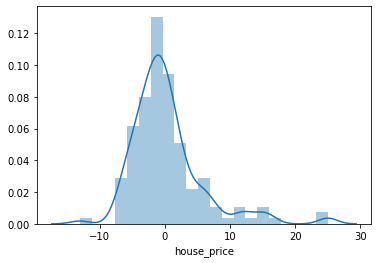

In [74]:
sns.distplot(y_test-predcition_ridge)

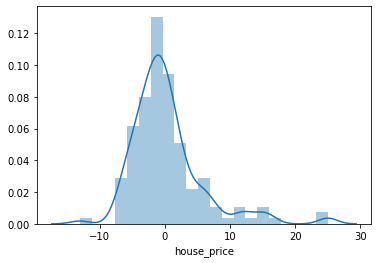

In [75]:
sns.distplot(y_test-predcition_lasso)

## Deployment

In [76]:
import pickle


In [77]:
import os 
os.chdir(r"D:\Project\CodeBasicsTasks\Ridge_and Lasso_Regression")

In [80]:
with open ("boston_house_price","wb") as f:
    pickle.dump(lasso_model,f)


In [82]:
with open("boston_house_price", "rb") as f:
    model = pickle.load(f)